PCA components:


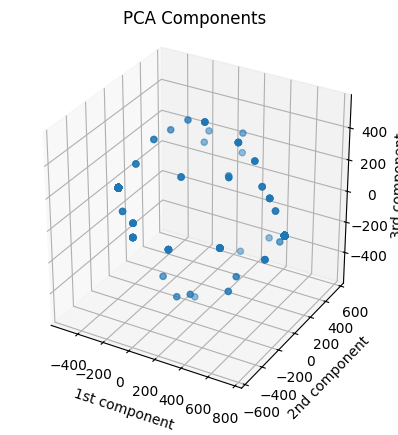

PCA directions:


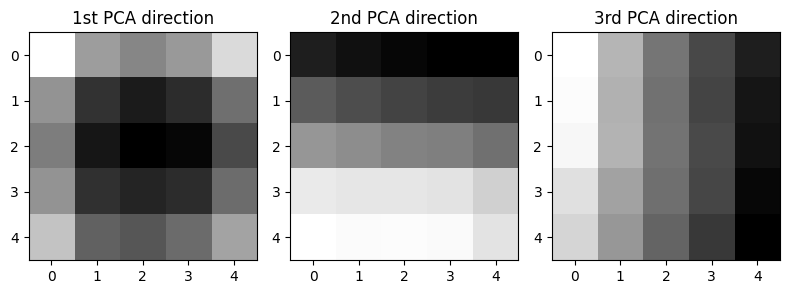

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.feature_extraction.image import extract_patches_2d 

def PCA(X, d):
    '''
    Inputs:
        X: (p, n) p is #features, n is #data points
        d: number of principal components to keep
    Outputs:
        V: (p, d)
        X_reduced: (d, n)
    '''
    X_bar = X - X.mean(axis = 1, keepdims = True)
    U, s, V = np.linalg.svd(X_bar)
    X_reduced = U[:, :d].T @ X_bar
    return U[:, :d], X_reduced, s, V
    

img = Image.open("circle.png").convert("L")
img_array = np.array(img)
patches = extract_patches_2d(img_array, (5, 5), max_patches = 5000).reshape(-1, 25).T
pca_directions, pca_components, _, _ = PCA(patches, 3)

print("PCA components:")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', aspect='equal')
ax.scatter(pca_components[0,:], pca_components[1,:], pca_components[2,:])
ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')
ax.title.set_text('PCA Components')
plt.savefig("Q_4_PCA_components.png")
plt.show()
print("PCA directions:")
plt.figure(figsize=(8, 3))
plt.subplot(1, 3, 1)
plt.imshow(pca_directions[:, 0].reshape(5, 5), cmap = "gray")
plt.title("1st PCA direction")
plt.subplot(1, 3, 2)
plt.imshow(pca_directions[:, 1].reshape(5, 5), cmap = "gray")
plt.title("2nd PCA direction")
plt.subplot(1, 3, 3)
plt.imshow(pca_directions[:, 2].reshape(5, 5), cmap = "gray")
plt.title("3rd PCA direction")
plt.tight_layout()
plt.savefig("Q_4_PCA_directions.png")
plt.show()